In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv("Group_8_data_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M,failure
0,0,298.1,308.6,1551,42.8,0,0,0,1,0
1,1,298.2,308.7,1408,46.3,3,0,1,0,0
2,2,298.1,308.5,1498,49.4,5,0,1,0,0
3,3,298.2,308.6,1433,39.5,7,0,1,0,0
4,4,298.2,308.7,1408,40.0,9,0,1,0,0


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.to_csv("Group_8_data_cleaned.csv")

In [6]:
df.head()

,air_temp,process_temp,rot_speed,torque,tool_wear,Type_H,Type_L,Type_M,failure
0,298.1,308.6,1551,42.8,0,0,0,1,0
1,298.2,308.7,1408,46.3,3,0,1,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0


In [7]:
X=df[['air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear',
       'Type_H', 'Type_L', 'Type_M']]
y=df['failure']

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,  stratify=y,test_size=0.2, random_state=42)

X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_full, y_train_full, stratify=y_train_full, test_size=0.25, random_state=42)

In [9]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train1,y_train1)


<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='failure'>

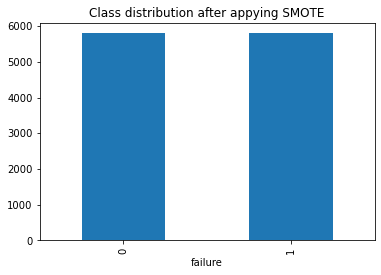

In [10]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='failure')


In [11]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

### Linear SVC

In [12]:
model = SVC(kernel="linear", C=100)
model.fit(X_train_scaled, y_train)

SVC(C=100, kernel='linear')

In [13]:
y_pred_train = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8904605830602036

In [14]:
y_pred_valid= model.predict(X_valid_scaled)
accuracy_score(y_valid, y_pred_valid)

0.892

In [15]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1932
           1       0.20      0.72      0.31        68

    accuracy                           0.89      2000
   macro avg       0.59      0.81      0.63      2000
weighted avg       0.96      0.89      0.92      2000



In [16]:
model.support_vectors_

array([[-0.09616719, -0.40957373,  0.05222585, ..., -0.23870224,
         0.89319545, -0.48474821],
       [ 0.8292902 ,  0.11667692, -0.20965692, ..., -0.23870224,
        -1.11957579,  2.06292665],
       [-0.76455309, -1.23653905, -0.86772134, ..., -0.23870224,
         0.89319545, -0.48474821],
       ...,
       [ 0.89371601,  0.49949708, -0.53197419, ..., -0.23870224,
         0.89319545, -0.48474821],
       [-0.04753071,  1.16042984,  0.01529367, ..., -0.23870224,
         0.89319545, -0.48474821],
       [-0.81403754, -0.25639455, -0.49168453, ..., -0.23870224,
         0.89319545, -0.48474821]])

#### Model Structure selection on linear kernel

In [17]:
param_grid={'C': [0.1,0.01,10, 100,1000],'kernel': ['linear']},
# grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,scoring='recall')
# grid_search = grid_search.fit(X_train_scaled,y_train)


rfc_rs = RandomizedSearchCV(estimator=model, 
                            param_distributions = param_grid,
                            cv = 5, 
                            n_jobs=-1, 
                            scoring = "recall")

rfc_rs.fit(X_train_scaled,y_train)

print(rfc_rs.best_params_)

print(rfc_rs.best_score_)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'kernel': 'linear', 'C': 0.01}
0.8794176013805004


In [18]:
y_pred = rfc_rs.best_estimator_.predict(X_valid_scaled)
accuracy_score(y_valid, y_pred)

0.887

In [19]:
best_parameters_1 = rfc_rs.best_params_
best_parameters_1

{'kernel': 'linear', 'C': 0.01}

In [20]:
y_pred= rfc_rs.best_estimator_.predict(X_valid_scaled)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1932
           1       0.19      0.71      0.30        68

    accuracy                           0.89      2000
   macro avg       0.59      0.80      0.62      2000
weighted avg       0.96      0.89      0.92      2000



In [21]:
model_linear_SVC = SVC(kernel=best_parameters_1['kernel'],C=best_parameters_1['C'])
model_linear_SVC.fit(X_train_scaled, y_train)

SVC(C=0.01, kernel='linear')

In [22]:
print(classification_report(y_valid,model_linear_SVC.predict(X_valid_scaled) ))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1932
           1       0.19      0.71      0.30        68

    accuracy                           0.89      2000
   macro avg       0.59      0.80      0.62      2000
weighted avg       0.96      0.89      0.92      2000



### Non-Linear SVC

In [23]:
model_poly = SVC(kernel="poly",probability=True)
model_poly.fit(X_train_scaled, y_train)

SVC(kernel='poly', probability=True)

In [24]:
y_pred_train = model_poly.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.9491978609625669

In [25]:
y_pred_valid= model_poly.predict(X_valid_scaled)
accuracy_score(y_valid, y_pred_valid)

0.9375

In [26]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97      1932
           1       0.32      0.76      0.45        68

    accuracy                           0.94      2000
   macro avg       0.66      0.85      0.71      2000
weighted avg       0.97      0.94      0.95      2000



#### Model Structure selection on 'poly' non-linear kernel

In [27]:
param_grid={'C': [0.1,1.0,5.0, 100],'kernel': [ 'poly'],'probability':[True,False],'degree':[2,3,4,5]}
# grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1)
# grid_search = grid_search.fit(X_train_scaled,y_train)

rfc_rs = RandomizedSearchCV(estimator=model_poly, 
                            param_distributions = param_grid,
                            cv = 5, 
                            n_jobs = -1, 
                            scoring = "recall")

rfc_rs.fit(X_train_scaled,y_train)

print(rfc_rs.best_params_)

print(rfc_rs.best_score_)

{'probability': True, 'kernel': 'poly', 'degree': 4, 'C': 100}
0.974984677635298


In [28]:
rfc_rs.best_estimator_

SVC(C=100, degree=4, kernel='poly', probability=True)

In [29]:
y_pred = rfc_rs.best_estimator_.predict(X_valid_scaled)
accuracy_score(y_valid, y_pred)

0.9495

In [30]:
best_parameters_2 = rfc_rs.best_params_
best_parameters_2

{'probability': True, 'kernel': 'poly', 'degree': 4, 'C': 100}

In [31]:
y_pred= rfc_rs.best_estimator_.predict(X_valid_scaled)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1932
           1       0.38      0.74      0.50        68

    accuracy                           0.95      2000
   macro avg       0.68      0.85      0.74      2000
weighted avg       0.97      0.95      0.96      2000



In [32]:
### Using kernel rbf
model = SVC(kernel="rbf", gamma="scale",C=1.0)
model.fit(X_train_scaled, y_train)

SVC()

In [33]:
y_pred_train = model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.9591167845437295

In [34]:
y_pred_valid= model.predict(X_valid_scaled)
accuracy_score(y_valid, y_pred_valid)

0.9435

In [35]:
print(classification_report(y_valid, y_pred_valid))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1932
           1       0.35      0.76      0.48        68

    accuracy                           0.94      2000
   macro avg       0.67      0.86      0.72      2000
weighted avg       0.97      0.94      0.95      2000



#### Model Structure selection on 'rbf' non-linear kernel

In [36]:
param_grid={'C': [0.1,1.0,5.0, 100],'gamma': [1,0.001,0.01,0.1,'scale'],'kernel': [ 'rbf']},
# grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1)
# grid_search = grid_search.fit(X_train_scaled,y_train)

rfc_rs = RandomizedSearchCV(estimator=model, 
                            param_distributions = param_grid,
                            cv = 5, 
                            n_jobs = -1, 
                            scoring = "recall")

rfc_rs.fit(X_train_scaled,y_train)

print(rfc_rs.best_params_)

print(rfc_rs.best_score_)

{'kernel': 'rbf', 'gamma': 1, 'C': 5.0}
0.9829203237035495


In [37]:
rfc_rs.best_estimator_

SVC(C=5.0, gamma=1)

In [38]:
y_pred = rfc_rs.best_estimator_.predict(X_valid_scaled)
accuracy_score(y_valid, y_pred)

0.961

In [39]:
best_parameters_2 = rfc_rs.best_params_
best_parameters_2

{'kernel': 'rbf', 'gamma': 1, 'C': 5.0}

In [40]:
y_pred= rfc_rs.best_estimator_.predict(X_valid_scaled)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.45      0.65      0.53        68

    accuracy                           0.96      2000
   macro avg       0.72      0.81      0.75      2000
weighted avg       0.97      0.96      0.96      2000



###### Model Structure selection on linear and non-linear SVM kernel parameters

In [41]:
param_grid={'C': [0.1,1.0,5.0, 100],'gamma': [1,0.1,0.01,0.001],'kernel': ['linear', 'rbf', 'poly'],'degree':[2,3,5]},
#grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1)
#grid_search = grid_search.fit(X_train_scaled,y_train)



rfc_rs = RandomizedSearchCV(estimator=SVC(), 
                            param_distributions = param_grid,
                            cv = 5, 
                            n_jobs=-1, 
                            scoring = "recall")

rfc_rs.fit(X_train_scaled,y_train)

print(rfc_rs.best_params_)

print(rfc_rs.best_score_)

{'kernel': 'poly', 'gamma': 0.1, 'degree': 2, 'C': 5.0}
0.9463498557020025


In [42]:
rfc_rs.best_estimator_
y_pred = rfc_rs.best_estimator_.predict(X_valid_scaled)
accuracy_score(y_valid, y_pred)

0.9265

In [43]:

y_pred= rfc_rs.best_estimator_.predict(X_valid_scaled)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1932
           1       0.29      0.81      0.43        68

    accuracy                           0.93      2000
   macro avg       0.64      0.87      0.69      2000
weighted avg       0.97      0.93      0.94      2000



#### SGD Classifier

In [44]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)
model.fit(X_train, y_train)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(alpha=0.01, max_iter=200)

In [45]:
y_pred = model.predict(X_valid)

In [46]:
print("Confusion Matrix")
matrix = confusion_matrix(y_valid, y_pred)
print(matrix)
# Classification Report
print("\nClassification Report")
report = classification_report(y_valid, y_pred)
print(report)

Confusion Matrix
[[1670  262]
 [  23   45]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1932
           1       0.15      0.66      0.24        68

    accuracy                           0.86      2000
   macro avg       0.57      0.76      0.58      2000
weighted avg       0.96      0.86      0.90      2000



In [47]:
loss = ['hinge'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, 
penalty=penalty, 
alpha=alpha, 
learning_rate=learning_rate, 
class_weight=class_weight, 
eta0=eta0) 

In [48]:
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV 
sgd = SGDClassifier(loss="hinge", penalty="l2") 
random = RandomizedSearchCV(estimator=sgd, 
param_distributions=param_distributions, 
scoring='roc_auc', 
verbose=1, n_jobs=-1,cv=5) 
random_result = random.fit(X_train, y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Score:  0.885077662262311
Best Params:  {'penalty': 'l1', 'loss': 'hinge', 'learning_rate': 'invscaling', 'eta0': 1, 'class_weight': {1: 0.6, 0: 0.4}, 'alpha': 0.0001}


In [49]:

y_pred= random_result.best_estimator_.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1932
           1       0.61      0.32      0.42        68

    accuracy                           0.97      2000
   macro avg       0.79      0.66      0.70      2000
weighted avg       0.96      0.97      0.97      2000



In [50]:
# best_parameters_2 = grid_search.best_params_
# best_parameters_2

#### Extreme Learning Machine

In [51]:
input_size = X_train.shape[1]

In [52]:
hidden_size = 1000

In [53]:
input_weights = np.random.normal(size=[input_size,hidden_size])
biases = np.random.normal(size=[hidden_size])

In [54]:
def relu(x):
    return np.maximum(x, 0, x)

In [55]:
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = relu(G)
    return H

In [56]:
import scipy
output_weights = np.dot(scipy.linalg.pinv(hidden_nodes(X_train)), y_train)

In [57]:
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

In [58]:
y_test_array=np.array(y_test)
print(y_test_array)

[0 0 0 ... 0 0 0]


In [59]:
def accurate(X_test):
    prediction = predict(X_test)
    correct = 0
    FN=0
    TP=0
    FP=0
    TN=0
    total = X_test.shape[0]
    p=[]
    a=[]
    for i in range(total):
        p.append(int(prediction[i]))
        a.append(int(y_test_array[i]))
        predicted = int(prediction[i])
        actual = int(y_test_array[i])
        if predicted == actual:
            correct+=1
        else:
            0
        if(actual==0):
            if(predicted==0):
                TN+=1
            else:
                FN+=1
        else:
            if(predicted==0):
                FP+=1
            else:
                TP+=1
    accuracy = correct/total
    recall=TP/(TP+FN)
    recall1=TN/(TN+FP)
    #print(a,p)
    print('Accuracy for ', hidden_size, ' hidden nodes: ', accuracy)
    #print(recall)
    #print(recall1)
    print( confusion_matrix(a,p))
    print(classification_report(a,p))
    #print(cm)
    return accuracy

In [60]:
accurate(X_test)

Accuracy for  1000  hidden nodes:  0.967
[[1929    3]
 [  63    5]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.62      0.07      0.13        68

    accuracy                           0.97      2000
   macro avg       0.80      0.54      0.56      2000
weighted avg       0.96      0.97      0.95      2000



0.967

In [61]:
### Tuning the hyperparameters
acc=[]
for hidden_size in range(500,2000,500):
    input_weights = np.random.normal(size=[input_size,hidden_size])
    biases = np.random.normal(size=[hidden_size])
    output_weights = np.dot(scipy.linalg.pinv(hidden_nodes(X_train)), y_train)
    acc.append(accurate(X_test))
    

Accuracy for  500  hidden nodes:  0.967
[[1932    0]
 [  66    2]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       1.00      0.03      0.06        68

    accuracy                           0.97      2000
   macro avg       0.98      0.51      0.52      2000
weighted avg       0.97      0.97      0.95      2000

Accuracy for  1000  hidden nodes:  0.969
[[1932    0]
 [  62    6]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       1.00      0.09      0.16        68

    accuracy                           0.97      2000
   macro avg       0.98      0.54      0.57      2000
weighted avg       0.97      0.97      0.96      2000

Accuracy for  1500  hidden nodes:  0.966
[[1927    3    1    1]
 [  63    5    0    0]
 [   0    0    0    0]
 [   0    0    0    0]]
              precision    recall  f1-score   support

           0       0.9

C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Student\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
